In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ac209a_hw3.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 3  AC209 : Linear Algebra, Accuracy, and Confidence Intervals


**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2pt">


In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **The notebook you submit must be run in order with all output visible**

### IMPORTS

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

**The data for this assignment are imported for you in the cells below.**

In [4]:
df = pd.read_csv("/Users/jamesliounis/Desktop/data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
%%capture --no-stdout --no-display
# Jupyter magic to silence pandas concat `FutureWarning` caused
# by statsmodels internals for add_constant. The assumption
# is that statsmodels will fix add_constant in a future release
# to conform to pandas requirements and prevent errors.

y = df[["mpg"]].values
X = df[["cyl","disp","hp","wt","qsec"]]

X = sm.add_constant(X)

<hr style="height:2pt">

## Linear Algebra, Accuracy, and Confidence Intervals

In this homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

### First a little review...

The linear model assumes:

$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:

$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


## <div class='exercise'>Question 1 [20 pts]</div>

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Fit a simple linear regression model to predict `mpg` with `disp` using [OLS](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) from `statsmodels.api` which will calculate confidence intervals (and other useful statistics) for you. Call your model `simple_model` and fit on the entire dataset.

Be aware that (1) unlike sklearn's LinearRegression, statsmodels does **not** add an intercept by default and (2) the expected order of arguments to `fit()` is flipped: $y$ first, then $X$. You can use `sm.add_constant()` to add the ones column (we did this for you above). As always, be sure to consult the [documentation](https://www.statsmodels.org/dev/index.html).

_Points:_ 1

In [6]:
simple_model = OLS(y, X[["disp", "const"]]).fit()
simple_model.params

disp     -0.041215
const    29.599855
dtype: float64

In [7]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

Once you've fit the model you can can call `simple_model.get_prediction().summary_frame()` to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing:

 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.

_Points:_ 2

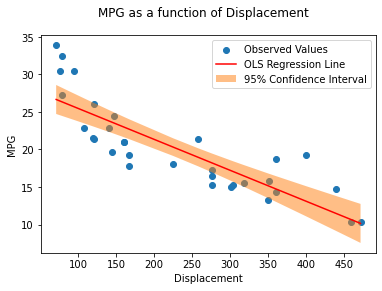

In [8]:
# Plotting the values that we observe:
plt.scatter(df["disp"], df["mpg"], label="Observed Values");

# Plotting the regression curve:

# Defining the regression function using lambda that takes a variable x,
# multiplies it with the models coefficients and adds an intercept
regression_ = lambda x : simple_model.params["disp"] * x + simple_model.params["const"]

# Creating some data to plot off
x_s = np.linspace(df["disp"].min(), df["disp"].max(), len(df))
plt.plot(x_s, regression_(x_s), label="OLS Regression Line", c="r")

# Creating our confidence intervals:
summary = simple_model.get_prediction().summary_frame() # Using function given to us
confidence_interval = df[["mpg","disp"]].join(summary[["mean_ci_lower", "mean_ci_upper"]]).sort_values("disp")
plt.fill_between(confidence_interval["disp"], y1=confidence_interval["mean_ci_lower"], y2=confidence_interval["mean_ci_upper"], alpha = 0.5, label="95% Confidence Interval")



plt.legend();
plt.xlabel("Displacement");
plt.ylabel("MPG");
plt.suptitle("MPG as a function of Displacement");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.3</b></div>

Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

_Points:_ 3

One may stress here that all predictions are accompanied by a certain degree of uncertainty. This is why when we defined our regression equation we introduced an error term. 

It is useful to recall here the definition of a confidence interval: sampling many times and computing a confidence interval for the true mean in each sample enables us to say with confidence that 95% of those intervals include the true value of the population mean. This reasoning is more accurate, and more reliable than a single prediction which could contain a significant error margin. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.4</b></div>

Someone asks what *mean* `mpg` you would predict for a `disp` value of 400. What do you tell them?

How might your answer change if this person said they aren't only concerned about the mean `mpg`, but rather the values they might actually observe? (Consider the confidence interval discussed above)

_Points:_ 3

I would predict a Mean mpg of: 13.113806771049497. However, if they are concerned by the values they actually observe I would rather tell them that 95% of the time they are going to observe values that lie between our upper and lower bounds i.e., between 11.1 and 15.12. 

In [9]:
# We substitute 400 in our regression equation and save it as a variable:

mean_mpg = regression_(400)
predicted_mpg = confidence_interval[confidence_interval["disp"]==400]

expected_mpg_lower_bound = predicted_mpg["mean_ci_lower"].item()
expected_mpg_upper_bound = predicted_mpg["mean_ci_upper"].item()

print('We can say with 95% confidence that the true value of this mean MPG for a disp value of 400 is between', 
      expected_mpg_lower_bound, 'and', expected_mpg_upper_bound
     )

print('We predict a mean mpg value of', mean_mpg)

We can say with 95% confidence that the true value of this mean MPG for a disp value of 400 is between 11.105975775409775 and 15.121637766689219
We predict a mean mpg value of 13.113806771049497


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.5</b></div>

Why does the 95% confidence interval for the mean predicted `mpg` become wider as we move away from the data's center? 

_Points:_ 3

Recall that the formula for a confidence interval is given by:

If $X_i \sim N(\mu,\sigma^2)$ with known $\sigma^2$ and unknown $\mu$. $100(1-\alpha)\%$ confidence interval for $\mu$ is.
$$\hat \mu_L =\bar x - z_{\alpha/2} \cdot \sigma/\sqrt{n},\; \hat \mu_U=\bar x + z_{\alpha/2} \cdot \sigma/\sqrt{n}$$

This formula depends on the sample standard deviation (in the numerator), which is the square root of the variance.
This provides the intuition as to why the 95% CI becomes wider: as we move away from the center of the data, there is higher variance, meaning that the values of $\sigma/\sqrt{n}\$ become larger. This term being added and subtracted to the mean widens the bounds. In this case as well, there seem to be fewer observations as well as we move away from the center of the data. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.6</b></div>

An alternative way to produce the confidence intervals from 1.2 is through the bootstrap. Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values. Use these bootstrapped estimates to build the 95% confidence intervals as in 1.2, and recreate the plot from that question with your new bootstrapped confidence intervals. Compare this new plot to the one from 1.2.

_Points:_ 5

Compared to our previous plot, we obtain a WIDER confidence interval using bootstrap samples. This is most likely representative of a higher variance, as per our reasoning in 1.5.

In [10]:
# Defining number of boots
n_boots = 100

# Creating empty lists to store inputs and predcitions
inputs = []
predictions = []

# Creating empty arrays for coefficients and intercepts:
coefficients = np.empty(n_boots,dtype='float64')
intercepts = np.empty(n_boots,dtype='float64')



constant_x = df[["disp"]]
constant_x = sm.add_constant(constant_x)
for b in range(n_boots):
    
    # Performing sampling with replacement:
    random_i = np.random.choice(df.index, replace=True, size=len(df))
    boots_df = df.loc[random_i]

    # Defining predictors and response variables: 
    y = boots_df[["mpg"]].values
    X = boots_df[["disp"]]
    X = sm.add_constant(X)

    # Fitting OLS model on data:
    simple_model = OLS(y, X).fit()
    params = simple_model.params

    # Computing predictions and appending them to a list
    p = list(simple_model.predict(constant_x))
    
    # Appending predictions to input list
    predictions.append(p)
    # Appending inputs to input list
    inputs.append(constant_x["disp"])
    
# We store these predictions in a dataframe:
predictions_generated_from_bootstraps = pd.DataFrame(data={"disp":np.array(inputs).flatten(),"mpg":np.array(predictions).flatten()})

# Defining two lambda functions to compute upper and lower bounds of CI:

lower_bound = lambda x : np.percentile(x,97.5)
upper_bound = lambda x: np.percentile(x, 2.5)

# Introducing 2 columns into our DataFrame with the upper and lower bounds:
bootstrap_CI = predictions_generated_from_bootstraps.groupby("disp").agg(upper_bound = ("mpg", upper_bound), 
                                                                                     lower_bound = ("mpg", lower_bound))

bootstrap_CI.reset_index(inplace=True)

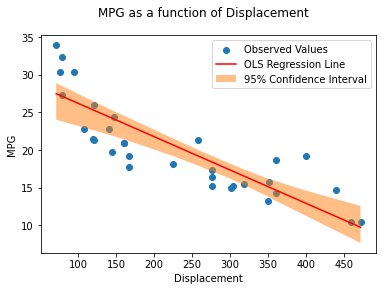

In [11]:
# We start by generating a scatter plot of our observed values:
plt.scatter(df["disp"], df["mpg"], label="Observed Values");

# Plotting the regression curve:

# Defining the regression function using lambda that takes a variable x,
# multiplies it with the models coefficients and adds an intercept (SLR formula)
regression_ = lambda x : simple_model.params["disp"] * x + simple_model.params["const"]

# Creating some data to plot off
x_s = np.linspace(df["disp"].min(), df["disp"].max(), len(df))
# Plot the inputs vs. predictions
plt.plot(x_s, regression_(x_s), label="OLS Regression Line", c="r")

# Creating our confidence intervals:
plt.fill_between(bootstrap_CI["disp"], y1=bootstrap_CI["lower_bound"], y2=bootstrap_CI["upper_bound"], alpha = 0.5, label="95% Confidence Interval")

plt.legend();
plt.xlabel("Displacement");
plt.ylabel("MPG");
plt.suptitle("MPG as a function of Displacement");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.7</b></div>

Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.

_Points:_ 3

Recall the reasoning elaborated in 1.5: the bounds of a CI depend on the variance, which increases as we get further away from the center of our observed data. Following a similar reason enables us to assert that the 95% CI for a disp value of 400 would be wider than the 95% CI for the mean predicted mpg. 

<!-- END QUESTION -->

**This concludes HW3-209. Thank you!**